In [1]:
import optforge as of
from optforge.benchmark.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np
import zoopt

inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A.jpeg")[:,:,0]

[zoopt] init solution 0, value: 0.9532223579014134
[zoopt] x: [-0.3669911091796764, 0.8734333930031162]
[zoopt] value: 0.021573910202547168


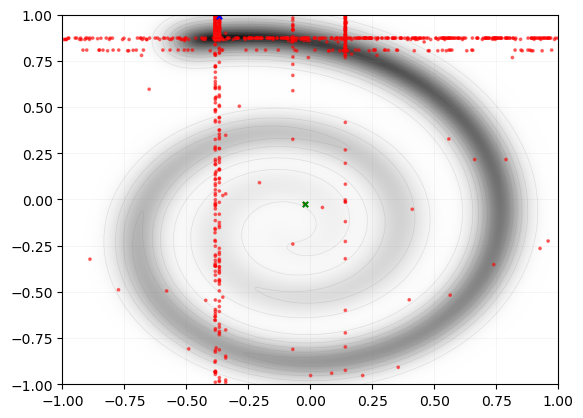

In [2]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(solution: zoopt.Solution):
    x = solution.get_x()
    return vob.step_noline(x)

dim = 2
obj = zoopt.Objective(objective, zoopt.Dimension(dim, [[-1, 1]]*dim, [True]*dim))
solution = zoopt.Opt.min(obj, zoopt.Parameter(budget=1000, seed=0, init_samples=[zoopt.Solution(vob.params)]))
# seed doesn't seem to make it reproducible

vob.plot()

[zoopt] init solution 0, value: 0.9532223579014134
evals: 1000/1000 | best value: 0.0197                            
Job finished in 0.6s., did 1000 evaluations.


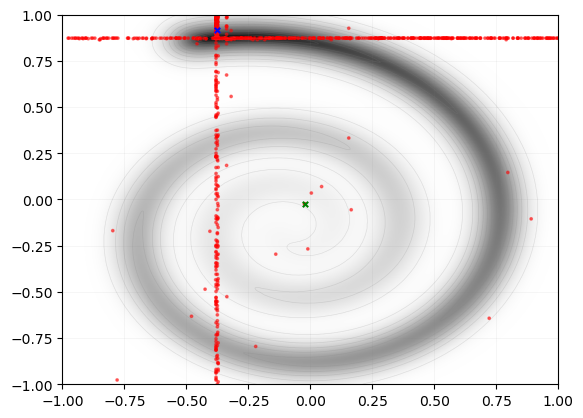

In [3]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.ZOOptimizer(seed=0)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)

vob.plot()

[zoopt] init solution 0, value: 0.7198746262729622
evals: 1000/1000 | best value: 0.0390                            
Job finished in 0.6s., did 1000 evaluations.


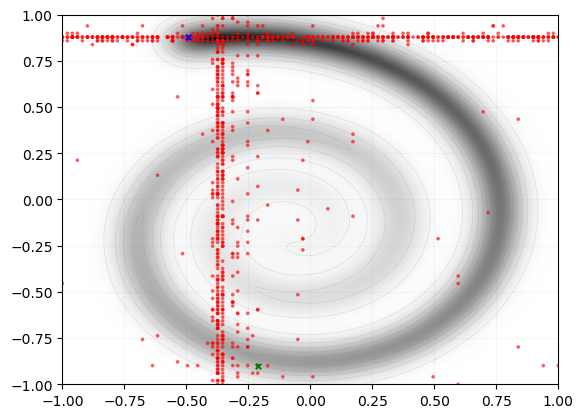

In [4]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(trial: of.Trial):
    xy = trial.suggest_categorical_array('xy', 2, np.linspace(-1, 1, 100), one_hot=False)
    return vob.step_noline(np.array(xy))

optimizer = of.integrations.ZOOptimizer(seed=0)

study = of.minimize_trial_func(
    objective,
    optimizer,
    max_evals = 1000,
)
vob.plot()